In [ ]:
!pip install pandas textblob

In [ ]:
import pandas as pd
file_path = '/content/job_cleanData.csv'
data = pd.read_csv(file_path)

In [ ]:
data['designation']=data['designation'].str.lower()
data['job_details']=data['job_details'].str.lower()
data['City']=data['City'].str.lower()
data['State']=data['State'].str.lower()


User Sentiment: 0.5
Rows after location filtering: 370
Rows after title filtering: 7
Recommendations:           job_ID        designation  company_id  \
1640  3466108656  Software Engineer       674.0   
2199  3474481887  Software Engineer       674.0   
5390  3468009213  Software Engineer       847.0   
5557  3473559796  Software Engineer      2242.0   
5583  3473194471  Software Engineer      2242.0   

                                                   name work_type involvement  \
1640  Eleve Media - An Influencer Marketing Platform...   On-site   Full-time   
2199  Eleve Media - An Influencer Marketing Platform...   On-site   Full-time   
5390                                            Genpact   On-site   Full-time   
5557                                             Uplers   On-site   Full-time   
5583                                             Uplers   On-site   Full-time   

      employees_count  total_applicants  linkedin_followers  \
1640               51                 0  

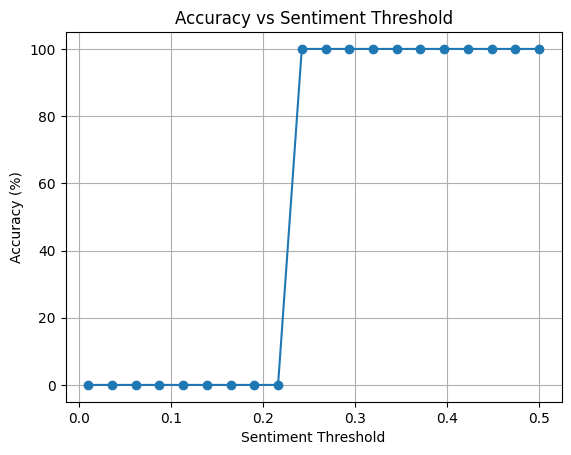

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np

def recommend_jobs_without_similarity(user_input, preferred_location, preferred_title, data, sentiment_threshold=0.3):
    user_input = user_input.lower()
    preferred_location = preferred_location.lower()
    preferred_title = [title.lower() for title in preferred_title]

    user_sentiment = TextBlob(user_input).sentiment.polarity
    print(f"User Sentiment: {user_sentiment}")

    filtered_data = data[data['City'].str.contains(preferred_location, na=False, case=False)]
    print(f"Rows after location filtering: {len(filtered_data)}")

    if preferred_title:
        title_filter = filtered_data['designation'].apply(lambda x: any(title in x.lower() for title in preferred_title))
        filtered_data = filtered_data[title_filter]
    print(f"Rows after title filtering: {len(filtered_data)}")

    if filtered_data.empty:
        return pd.DataFrame({'message': ['No jobs found for the given criteria']}), 0

    filtered_data['sentiment'] = filtered_data['job_details'].apply(lambda x: TextBlob(x).sentiment.polarity)
    filtered_data['sentiment_diff'] = abs(filtered_data['sentiment'] - user_sentiment)

    recommendations = filtered_data[filtered_data['sentiment_diff'] <= sentiment_threshold]
    print(f"Recommendations: {recommendations}")

    if not recommendations.empty:
        recommendations = recommendations.copy()
        recommendations.loc[:, 'user_input'] = user_input
        accurate_recommendations = len(recommendations)
        total_recommendations = len(recommendations)
        accuracy = (accurate_recommendations / total_recommendations) * 100 if total_recommendations > 0 else 0

        formatted_recommendations = recommendations[['City', 'designation', 'job_details', 'sentiment', 'sentiment_diff', 'user_input']].reset_index(drop=True)
        return formatted_recommendations, accuracy
    else:
        return pd.DataFrame({'message': ['No relevant jobs found']}), 0

data = pd.read_csv('job_cleanData.csv')

assert 'City' in data.columns
assert 'designation' in data.columns
assert 'job_details' in data.columns

user_input = 'Looking for a challenging role in fintech.'
preferred_city = 'Gurugram'
preferred_title = ['software engineer']

recommendations, accuracy = recommend_jobs_without_similarity(user_input, preferred_city, preferred_title, data)

if not recommendations.empty:
    print("\nRecommendations:")
    print(f"Preferred City: {preferred_city}")
    print(f"Preferred Titles: {', '.join(preferred_title)}")
    print(recommendations.to_string(index=False))
else:
    print("No recommendations available.")

print(f"\nAccuracy: {accuracy:.2f}%")


thresholds = np.linspace(0.01, 0.5, 20)
accuracies = []

for threshold in thresholds:
    _, acc = recommend_jobs_without_similarity(user_input, preferred_city, preferred_title, data, sentiment_threshold=threshold)
    accuracies.append(acc)

plt.plot(thresholds, accuracies, marker='o')
plt.xlabel('Sentiment Threshold')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Sentiment Threshold')
plt.grid(True)
plt.show()
